In [1]:
import numpy as np
import scipy.io
import time
import psutil
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigs

/usr/local/anaconda3/envs/inmas/lib/python3.11/site-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1272: RuntimeWarning: k >= N - 1 for N * N square matrix. Attempting to use scipy.linalg.eig instead.
  warnings.warn("k >= N - 1 for N * N square matrix. "


Text(0.5, 1.0, 'True Eigenvalues for matrix A')

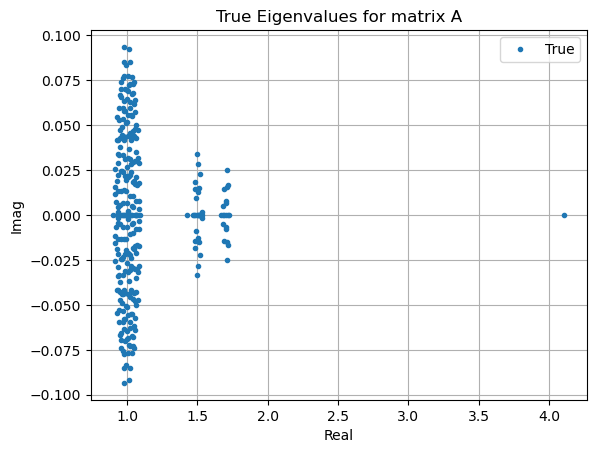

In [2]:
# load the data
data = scipy.io.loadmat('hw4.mat')
A = data["A"]

# compute true eigenvalues for matrix A
true_evals, _ = eigs(A, k=A.shape[0])

# plot all true eigenvalues
plt.plot(true_evals.real, true_evals.imag, '.', label="True")
plt.xlabel("Real")
plt.ylabel("Imag")
plt.grid()
plt.legend()
plt.title("True Eigenvalues for matrix A")

In [3]:
# Arnoldi iteration
# takes input matrix A, vector b, and scalar value n (or denoted as k)
def arnoldi(A, b, n):
    m, m = A.shape
    nK = 0
    H = np.zeros((n+1, n), dtype=float)
    Q = np.zeros((m, n+1), dtype=float)
    v = np.zeros(m, dtype=float)

    Q[:, 0] = b / np.linalg.norm(b)

    for k in range(1, n + 1):
        v = np.dot(A, Q[:, k - 1])
        nK = k

        for j in range(1, k + 1):
            H[j - 1, k - 1] = np.dot(Q[:, j - 1], v)
            v = v - H[j - 1, k - 1] * Q[:, j - 1]

        H[k, k - 1] = np.linalg.norm(v)

        if H[k, k - 1] < 1.0e-14:
            break

        Q[:, k] = v / H[k, k - 1]

    return H, Q, v, nK

Text(0.5, 1.0, 'Upper Hessenberg matrix H')

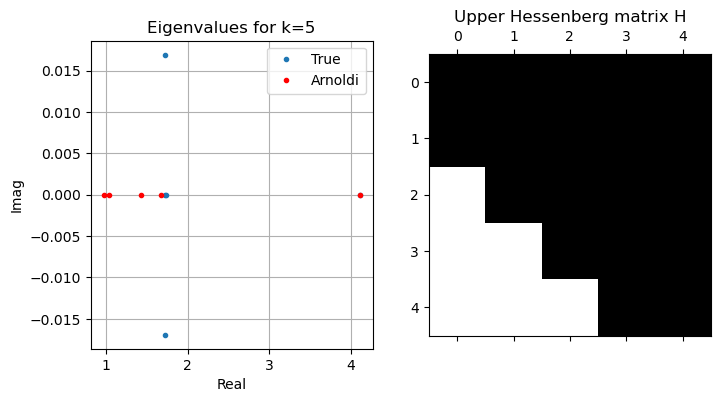

In [4]:
# let k=5
n = 5
b = np.ones(A.shape[0])

# Arnoldi
H, Q, v, nK = arnoldi(A, b, n)
Ritz, _ = eigs(H[0:nK,0:nK], k=n)

# Implicit
true_evals, _ = eigs(A, k=n)


# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(true_evals.real, true_evals.imag,'.', label="True")
ax1.plot(Ritz.real, Ritz.imag, '.r', label="Arnoldi")
ax1.set_xlabel("Real")
ax1.set_ylabel("Imag")
ax1.grid()
ax1.legend()
ax1.set_title('Eigenvalues for k={}'.format(n))

ax2.spy(H[:-1,:])
ax2.set_title("Upper Hessenberg matrix H")

Text(0.5, 1.0, 'Upper Hessenberg matrix H')

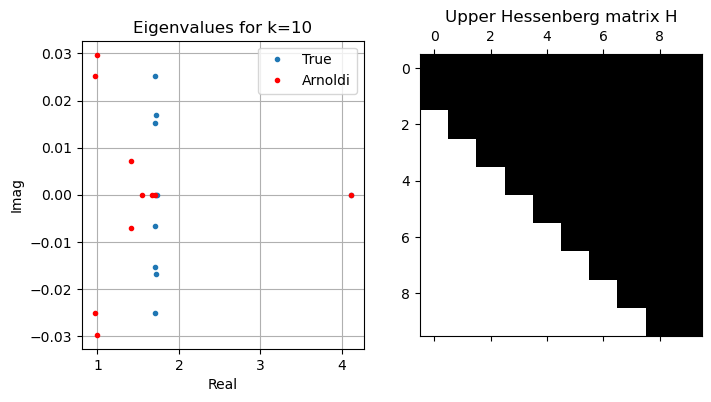

In [5]:
# let k=10
n = 10
b = np.ones(A.shape[0])

# Arnoldi
H, Q, v, nK = arnoldi(A, b, n)
Ritz, _ = eigs(H[0:nK,0:nK], k=n)

# Implicit
true_evals, _ = eigs(A, k=n)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(true_evals.real, true_evals.imag,'.', label="True")
ax1.plot(Ritz.real, Ritz.imag, '.r', label="Arnoldi")
ax1.set_xlabel("Real")
ax1.set_ylabel("Imag")
ax1.grid()
ax1.legend()
ax1.set_title('Eigenvalues for k={}'.format(n))

ax2.spy(H[:-1, :])
ax2.set_title("Upper Hessenberg matrix H")

Text(0.5, 1.0, 'Upper Hessenberg matrix H')

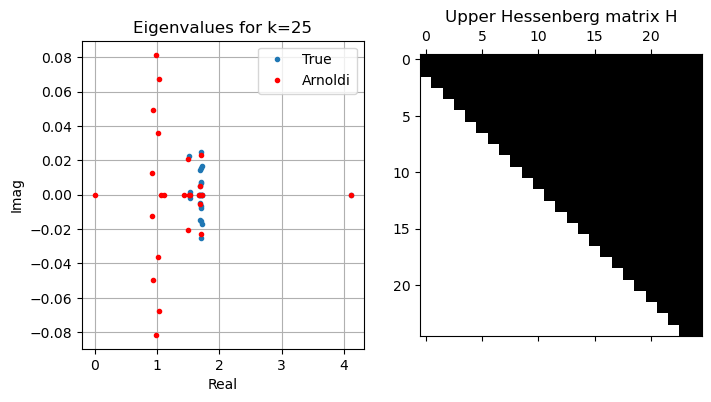

In [6]:
# let k=25
n = 25
b = np.ones(A.shape[0])

# Arnoldi
H, Q, v, nK = arnoldi(A, b, n)
Ritz, _ = eigs(H[0:nK,0:nK], k=n)

# Implicit
true_evals, _ = eigs(A, k=n)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(true_evals.real, true_evals.imag,'.', label="True")
ax1.plot(Ritz.real, Ritz.imag, '.r', label="Arnoldi")
ax1.set_xlabel("Real")
ax1.set_ylabel("Imag")
ax1.grid()
ax1.legend()
ax1.set_title('Eigenvalues for k={}'.format(n))

ax2.spy(H[:-1, :])
ax2.set_title("Upper Hessenberg matrix H")

Text(0.5, 1.0, 'Upper Hessenberg matrix H')

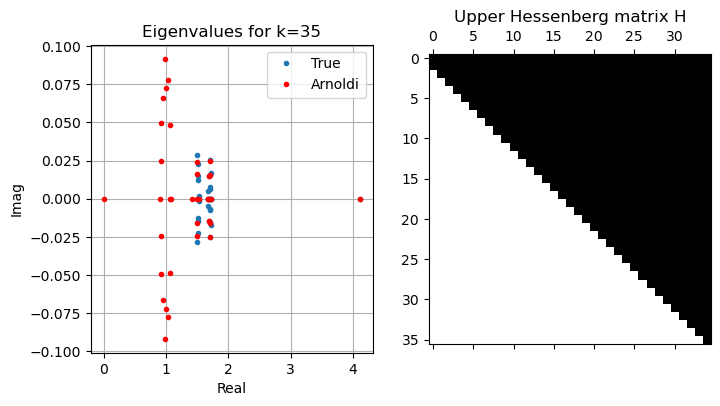

In [7]:
# let k=35
n = 35
b = np.ones(A.shape[0])

# Arnoldi
H, Q, v, nK = arnoldi(A, b, n)
Ritz, _ = eigs(H[0:nK,0:nK], k=n)

# Implicit
true_evals, _ = eigs(A, k=n)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(true_evals.real, true_evals.imag,'.', label="True")
ax1.plot(Ritz.real, Ritz.imag, '.r', label="Arnoldi")
ax1.set_xlabel("Real")
ax1.set_ylabel("Imag")
ax1.grid()
ax1.legend()
ax1.set_title('Eigenvalues for k={}'.format(n))

ax2.spy(H)
ax2.set_title("Upper Hessenberg matrix H")

Text(0.5, 1.0, 'Upper Hessenberg matrix H')

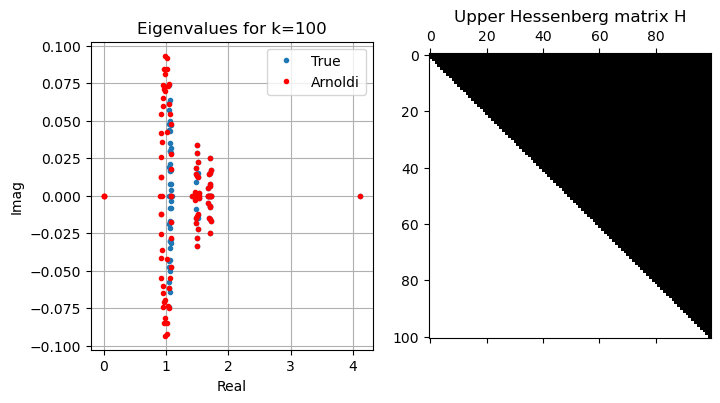

In [8]:
# let k=100
n = 100
b = np.ones(A.shape[0])

# Arnoldi
H, Q, v, nK = arnoldi(A, b, n)
Ritz, _ = eigs(H[0:nK,0:nK], k=n)

# Implicit
true_evals, _ = eigs(A, k=n)

# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.plot(true_evals.real, true_evals.imag,'.', label="True")
ax1.plot(Ritz.real, Ritz.imag, '.r', label="Arnoldi")
ax1.set_xlabel("Real")
ax1.set_ylabel("Imag")
ax1.grid()
ax1.legend()
ax1.set_title('Eigenvalues for k={}'.format(n))

ax2.spy(H)
ax2.set_title("Upper Hessenberg matrix H")